# Laboratorio 5/Septiembre/2019

### Alvarado Morán Óscar Anuar

In [21]:
%matplotlib inline
import multiprocessing as mp
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from multiprocessing import Process

* Crea un proceso que construya 5 procesos hijos. "Captura" los id's de los procesos hijos y crea una tabla.

In [22]:
def nombre(numero):
    print('ID proceso hijo',numero, '=', os.getpid())
    
def crear_proceso(cuantos):
    print("Proceso padre: ", os.getppid())
    for i in range(cuantos):
        p1 = mp.Process(target = nombre, args = (i,))
        p1.start()
        p1
        
p = mp.Process(target = crear_proceso, args = (5,))
p.start()

Proceso padre:  12227
ID proceso hijo 0 = 18999
ID proceso hijo 1 = 19000
ID proceso hijo 3 = 19006
ID proceso hijo 2 = 19005
ID proceso hijo 4 = 19007


* Crea un proceso que cree dos procesos hijos 

    a) Un proces hijo crea la gráfica de f(x) = x² + x - 2
    
    b) El otro proceso crea la gráfica de f(x) = x³ - 2x² + x + 1 
    
    c) Calcula tiempos versión secuencial, versión concurrente.

In [44]:
def f1(x):
    global a 
    y = x **2 + x - 2
    plt.plot(x,y)
    #print(a)
    
def f2(x):
    global b
    y = x ** 3 - 2*x ** 2 + x + 1 
    b = plt.plot(x,y)
    

def dos_procesos(x):
    p1 = mp.Process(target = f1, args = (x,))
    p2 = mp.Process(target = f2, args = (x,))
    
    p1.start()
    p2.start()
    

x = np.arange(-100, 100)
t = time.time()
PP = mp.Process(target = dos_procesos, args = (x,))
PP.start()
print("Tiempo de ejecución: ", time.time()-t)


Tiempo de ejecución:  0.00740361213684082


    
* Elabora dos programas 

    a) Secuencial reduce en 1 unidad la variable a = 10⁶ hasta llegar a 0.
    
    b) Concurrente: crea dos procesos que reduzcan a = 10⁶/2 y b = 10⁶/2.
    
    c) Calcula tiempos.

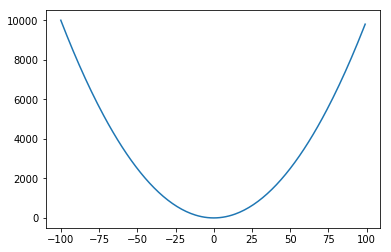

In [41]:
graf1 = plt.plot(x, x**2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

fig, ax = plt.subplots()
myplot = ax.errorbar(x, y, xerr=0.2, yerr=0.4)

In [24]:
def decrecer(a = 10 ** 6):
    while a > 0:
        a = a - 1
    return 

In [25]:
p1 = mp.Process(target = decrecer, args = ((10**6)/2,))
p2 = mp.Process(target = decrecer, args = ((10**6)/2,))

t = time.time()
p1.start()
p2.start()

print("Tiempo de ejecución: ", time.time()-t)

Tiempo de ejecución:  0.014001131057739258


In [26]:
t = time.time()
decrecer()
print("Tiempo de ejecución: ", time.time()-t)

Tiempo de ejecución:  0.11819863319396973


In [11]:
class MyProcess(mp.Process):
    def __init__(self):
        super(MyProcess, self).__init__()

    def run(self):
        print("Child Process PID: {}".format(mp.current_process().pid))

def main():
    print("Main Process PID: {}".format(mp.current_process().pid))
    myProcess = MyProcess()
    myProcess.start()
    myProcess.join()
        
main()

Main Process PID: 12227
Child Process PID: 18506


In [20]:
myPocess = MyProcess()
a = myPocess.name
a

'MyProcess-14'